In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Using pandas to read the CSV file into a DataFrame
tdata = pd.read_csv("/content/Titanic-Dataset.csv")

# Display the first few rows of the DataFrame to verify that the data has been imported correctly
tdata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
print("Contents of the Dataset:")
print(tdata.head())

# Performing some basic operations on the dataset file
print("\nSummary Statistics:")
print(tdata.describe())
print(tdata.columns)

Contents of the Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [35]:
tdata.shape

(891, 12)

In [34]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
# Check for missing values in the dataset
tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# Fill missing values
tdata['Age'].fillna(tdata['Age'].median(), inplace=True)
tdata['Embarked'].fillna(tdata['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column
tdata.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
tdata = pd.get_dummies(tdata, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
tdata.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Display the first few rows of the preprocessed dataset
tdata.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


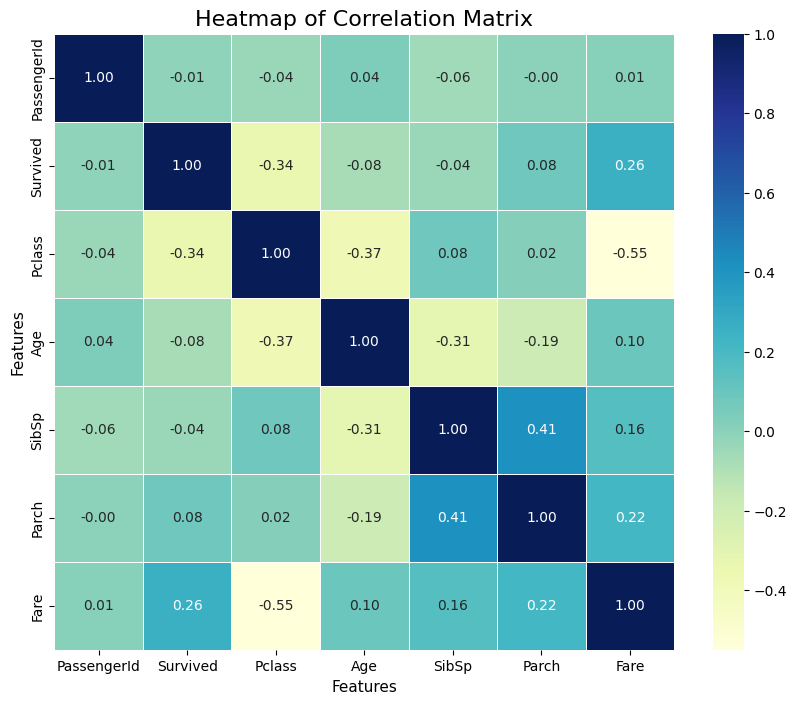

In [33]:
# Computing the correlation matrix with numeric_only=True
corr = tdata.corr(numeric_only=True)

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar=True)

# Adding a title and labels
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=11)
plt.ylabel('Features', fontsize=11)

# Displaying the heatmap
plt.show()

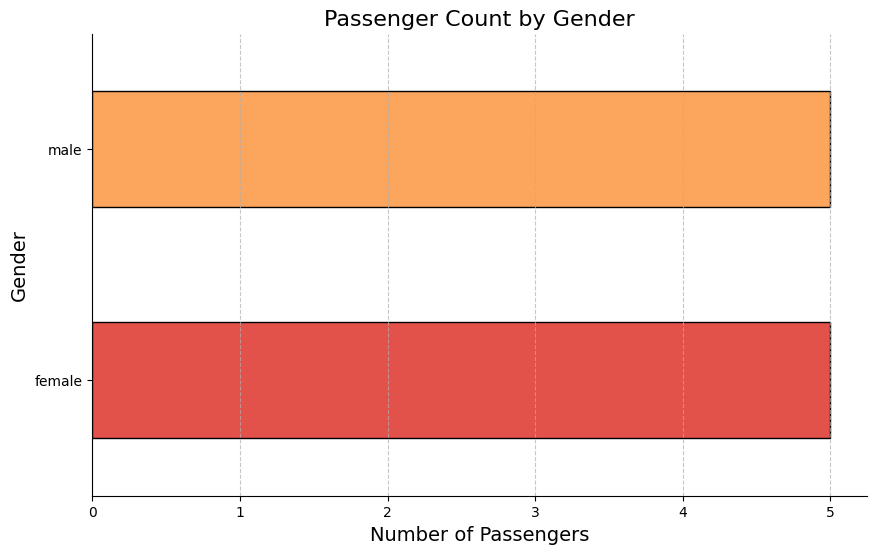

In [22]:
# Set a custom color palette
custom_colors = sns.color_palette('Set2')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = _df_4.groupby('Sex').size().plot(kind='barh', color=sns.color_palette('Spectral'), edgecolor='black')

# Customizing the plot
plt.title('Passenger Count by Gender', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

<ipython-input-50-58251e42b1fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_46, x='PassengerId', y='Sex', inner='stick', palette='Dark2')


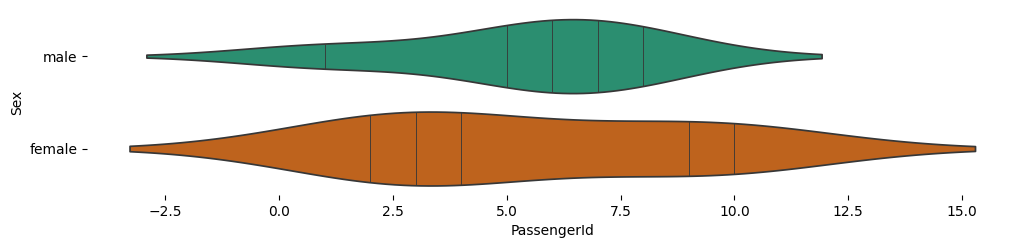

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='PassengerId', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

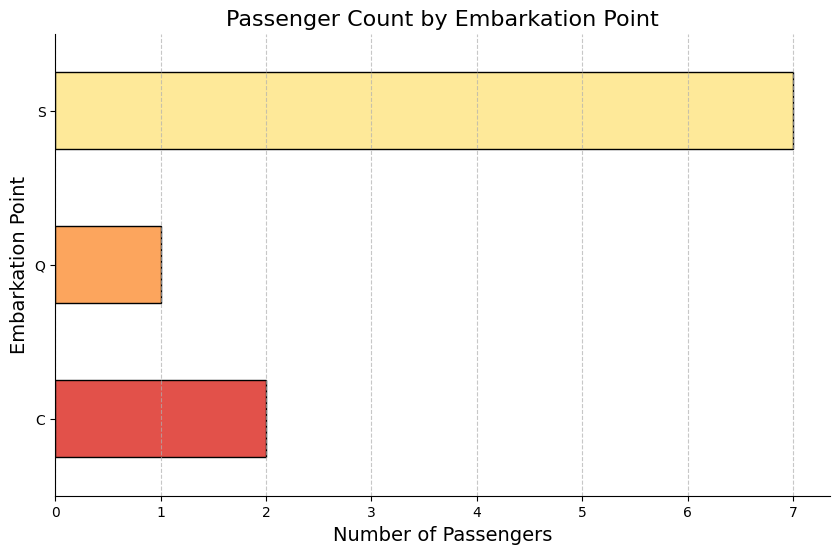

In [23]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = _df_6.groupby('Embarked').size().plot(kind='barh', color=sns.color_palette('Spectral'), edgecolor='black')

# Customizing the plot
plt.title('Passenger Count by Embarkation Point', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Embarkation Point', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**Time Series For Gender**

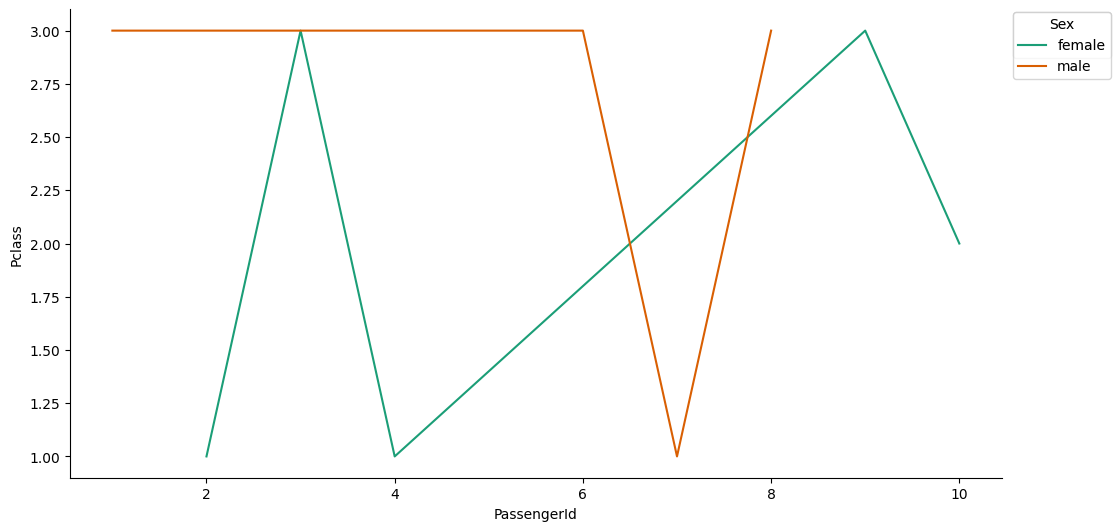

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

<Figure size 1000x600 with 0 Axes>

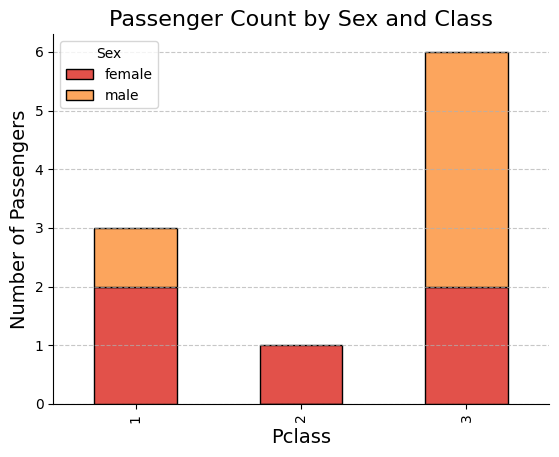

In [28]:
plt.figure(figsize=(10, 6))
pd.crosstab(_df_4['Pclass'], _df_4['Sex']).plot(kind='bar', stacked=True, color=sns.color_palette('Spectral'), edgecolor='black')

# Customizing the plot
plt.title('Passenger Count by Sex and Class', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [42]:
# Define features and target variable
X = tdata.drop(columns=['Survived'])
y = tdata['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


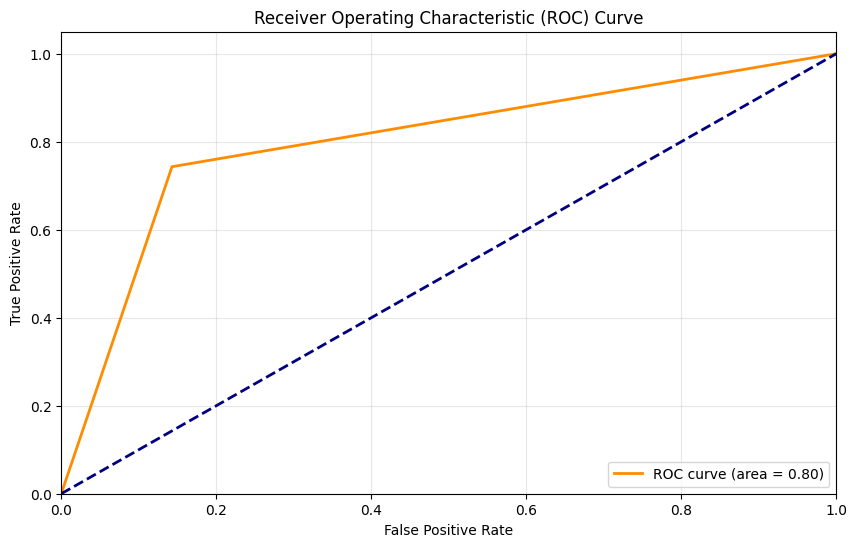

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()